In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
adult = pd.read_csv("https://raw.githubusercontent.com/uvm-plaid/programming-dp/master/notebooks/adult_with_pii.csv");

In [8]:
adult.head()

,Name,DOB,SSN,Zip,Workclass,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Hours per week,Country,Target,Age,Capital Gain,Capital Loss
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,56,2174,0
1,Brandise Tripony,6/7/1988,150-19-2766,61523,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35,0,0
2,Brenn McNeely,8/6/1991,725-59-9860,95668,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,32,0,0
3,Dorry Poter,4/6/2009,659-57-4974,25503,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,14,0,0
4,Dick Honnan,9/16/1951,220-93-3811,75387,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,72,0,0


In [11]:
adult_data = adult.copy().drop(columns=['Name','SSN'])
adult_pii = adult[['Name','SSN','DOB','Zip']]
adult_data.head(1)

,DOB,Zip,Workclass,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Hours per week,Country,Target,Age,Capital Gain,Capital Loss
0,9/7/1967,64152,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,56,2174,0


In [12]:
karries_row = adult_pii[adult_pii['Name'] == 'Karrie Trusslove']
pd.merge(karries_row, adult_data, left_on=['DOB','Zip'],right_on=['DOB','Zip'])

,Name,SSN,DOB,Zip,Workclass,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Hours per week,Country,Target,Age,Capital Gain,Capital Loss
0,Karrie Trusslove,732-14-6110,9/7/1967,64152,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,56,2174,0


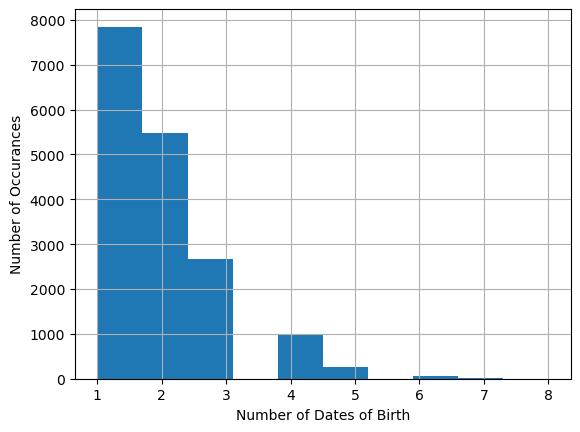

In [13]:
adult_pii['DOB'].value_counts().hist()
plt.xlabel('Number of Dates of Birth')
plt.ylabel('Number of Occurances');

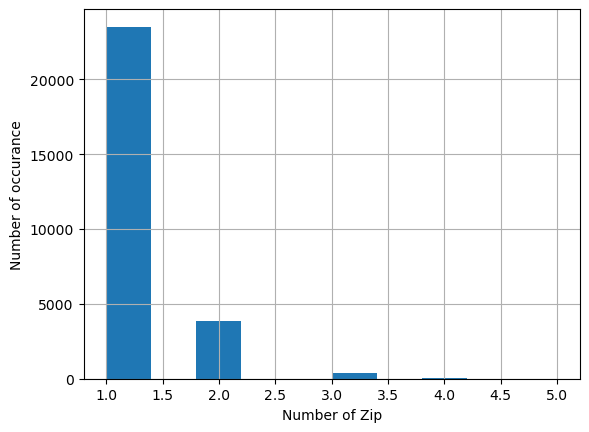

In [14]:
adult_pii['Zip'].value_counts().hist()
plt.xlabel('Number of Zip')
plt.ylabel('Number of occurance');

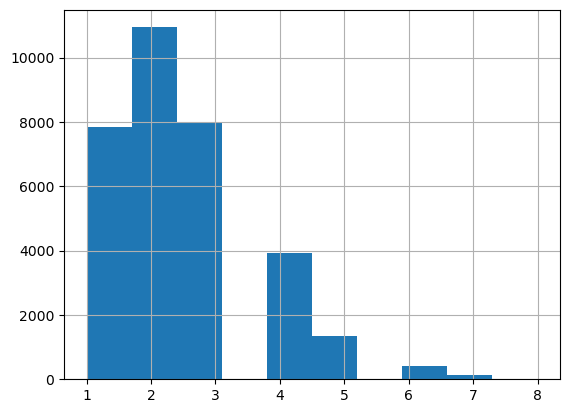

In [15]:
attack = pd.merge(adult_pii, adult_data,left_on=['DOB'],right_on=['DOB'])
attack['Name'].value_counts().hist();

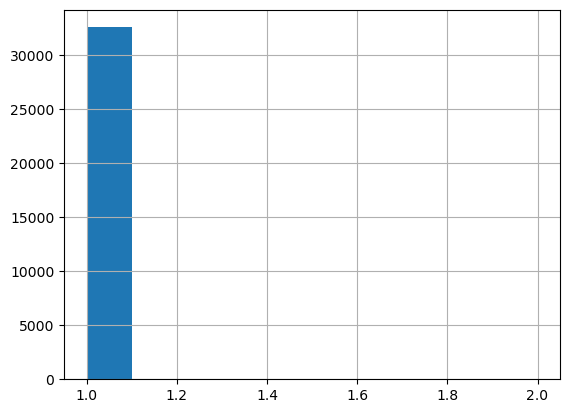

In [15]:
attack = pd.merge(adult_pii, adult_data,left_on=['DOB','Zip'],right_on=['DOB','Zip'])
attack['Name'].value_counts().hist();

In [16]:
attack['Name'].value_counts().head()

Latrena Rohlfs       8
Sauveur McTrustie    8
Harmony Jaszczak     8
Bruce Rootes         8
Sherlock Sherwin     8
Name: Name, dtype: int64

In [17]:
adult['Age'].mean()

41.77250253355035

In [18]:
adult[['Education','Age']].groupby('Education',as_index=False).mean().head(3)

,Education,Age
0,10th,42.032154
1,11th,42.057021
2,12th,41.879908


In [19]:
adult[['Zip','Age']].groupby('Zip', as_index=False).mean().head()

,Zip,Age
0,4,72.0
1,12,46.0
2,16,38.0
3,17,31.0
4,18,40.0


In [20]:
adult['Age'].sum()

1360238

In [21]:
adult[adult['Name']!='karrie Trusslove']['Age'].sum()

1360238

In [22]:
adult['Age'].sum()-adult[adult['Name']!='Karrie Trusslove']['Age'].sum()

56

# K-Anonymity

In [26]:
def isKAnonymized(df, k):
    for index, row in df.iterrows():
        query = ' & '.join([f'{col} == {row[col]}' for col in df.columns])
        rows = df.query(query)
        if rows.shape[0] < k:
            return False
    return True

In [27]:
df = adult_data[['Age', 'Education-Num']]
df.columns = ['age','edu']
isKAnonymized(df.head(100),1)

True

# Checking for k-Anonymity

In [34]:
raw_data = {
    'first_name':['Jason','Molly','Tina','Jake','Amy'],
    'Last_name':['Miller','Jacobson','Ali','Milner','Cooze'],
    'age':[42,52,36,24,73],
    'preTestScore': [4,24,31,2,3],
    'postTestScore':[25,94,57,62,70]
}
df = pd.DataFrame(raw_data, columns = ['age','preTestScore','postTestScore'])
df

,age,preTestScore,postTestScore
0,42,4,25
1,52,24,94
2,36,31,57
3,24,2,62
4,73,3,70


In [32]:
def isKAnonymized(df, k):
    for index, row in df.iterrows():
        query = ' & '.join([f'{col} == {row[col]}' for col in df.columns])
        rows = df.query(query)
        if rows.shape[0] < k:
            return False
    return True

In [35]:
isKAnonymized(df,1)

True

In [36]:
isKAnonymized(df,2)

False

# Generalizing Data to Satisfy k-Anonymity

In [37]:
def generalize(df, depths):
    return df.apply(lambda x: x.apply(lambda y: int(int(y/(10**depths[x.name]))*(10**depths[x.name]))))


In [38]:
depths = {
    'age' : 1,
    'preTestScore' : 1,
    'postTestScore' :1
}
df2 = generalize(df, depths)
df2

,age,preTestScore,postTestScore
0,40,0,20
1,50,20,90
2,30,30,50
3,20,0,60
4,70,0,70


In [39]:
isKAnonymized(df2,2)

False

In [40]:
depths = {
    'age': 2,
    'preTestScore': 2,
    'postTestScore': 2
}
generalize(df, depths)

,age,preTestScore,postTestScore
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [41]:
df = adult_data[['Age', 'Education-Num']]
df.columns = ['age', 'edu']
isKAnonymized(df.head(100), 1)

True

In [42]:
isKAnonymized(df.head(100), 2)

False

In [43]:
# outliers are a real problem!
depths = {
    'age': 1,
    'edu': 1
}
df2 = generalize(df.head(100), depths)
isKAnonymized(df2, 2)

False

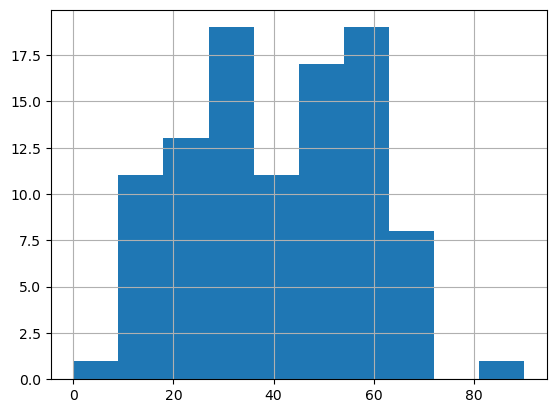

In [44]:
df2['age'].hist();

In [45]:
#clipping away outliers

depths = {
    'age': 1,
    'edu': 1
}
dfp = df.clip(upper=np.array([60, 100000000]), axis='columns')
dfp = dfp.clip(lower=np.array([10, 3]), axis='columns')
df2 = generalize(dfp.head(500), depths)
isKAnonymized(df2, 7)

True

# Differential Privacy - Laplace Mechanism

In [46]:
adult[adult['Age'] >= 40].shape[0]

17450

In [47]:
sensitivity = 1
epsilon = 0.1

adult[adult['Age'] >= 40].shape[0] + np.random.laplace(loc=0, scale=sensitivity/epsilon)

17428.31523762184

In [48]:
karries_row = adult[adult['Name'] == 'Karrie Trusslove']
karries_row[karries_row['Target'] == '<=50K'].shape[0]

1

In [49]:
sensitivity = 1
epsilon = 0.1

karries_row = adult[adult['Name'] == 'Karrie Trusslove']
karries_row[karries_row['Target'] == '<=50K'].shape[0] + \
  np.random.laplace(loc=0, scale=sensitivity/epsilon)

-20.51839798828645

In [50]:
epsilon1 = 1
epsilon2 = 1
epsilon_total = 2

# satisfies 1-differential privacy
def F1():
    return np.random.laplace(loc=0, scale=1/epsilon1)

# satisfies 1-differential privacy
def F2():
    return np.random.laplace(loc=0, scale=1/epsilon2)

# satisfies 2-differential privacy
def F3():
    return np.random.laplace(loc=0, scale=1/epsilon_total)

# satisfies 2-differential privacy, by sequential composition
def F_combined():
    return (F1() + F2()) / 2

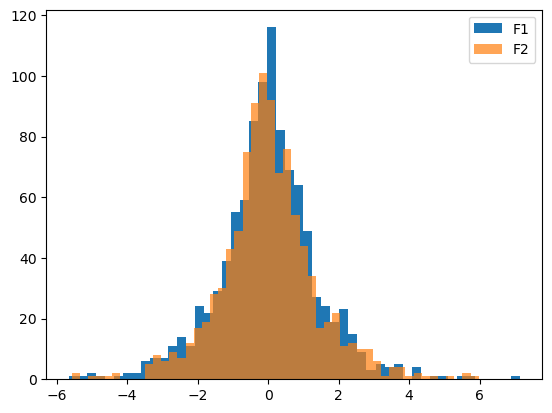

In [51]:
# plot F1
plt.hist([F1() for i in range(1000)], bins=50, label='F1');

# plot F2 (should look the same)
plt.hist([F2() for i in range(1000)], bins=50, alpha=.7, label='F2');
plt.legend();

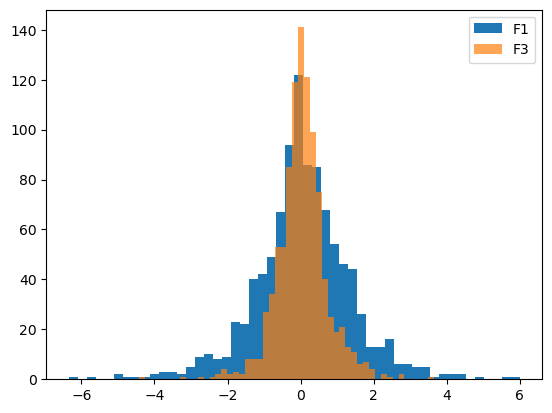

In [52]:
# plot F1
plt.hist([F1() for i in range(1000)], bins=50, label='F1');

# plot F3 (should look "pointier")
plt.hist([F3() for i in range(1000)], bins=50, alpha=.7, label='F3');
plt.legend();

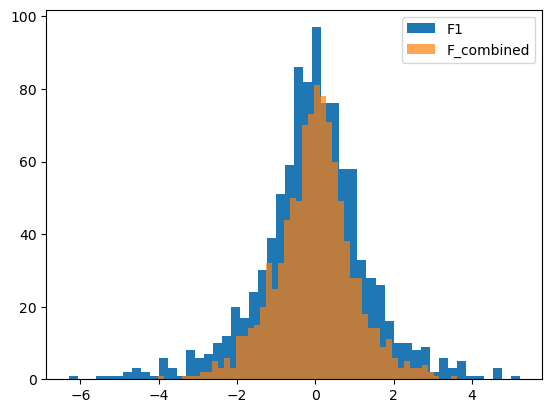

In [53]:
# plot F1
plt.hist([F1() for i in range(1000)], bins=50, label='F1');

# plot F_combined (should look "pointier")
plt.hist([F_combined() for i in range(1000)], bins=50, alpha=.7, label='F_combined');
plt.legend();

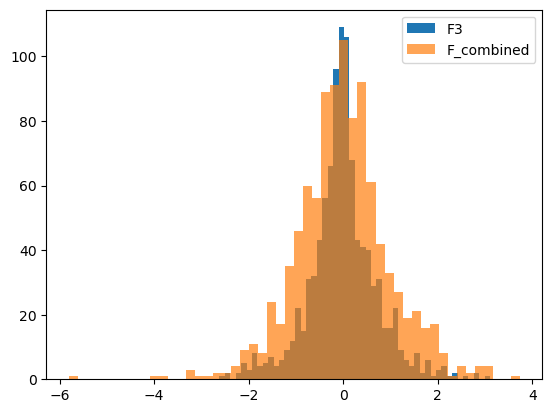

In [54]:
# plot F1
plt.hist([F3() for i in range(1000)], bins=50, label='F3');

# plot F_combined (should look "pointier")
plt.hist([F_combined() for i in range(1000)], bins=50, alpha=.7, label='F_combined');
plt.legend();

In [56]:
adult = pd.read_csv("https://raw.githubusercontent.com/uvm-plaid/programming-dp/master/notebooks/adult_with_pii.csv")
adult['Education'].value_counts().to_frame().head(5)

,Education
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1383


In [57]:
epsilon = 1

# This analysis has a total privacy cost of epsilon = 1, even though we release many results!
f = lambda x: x + np.random.laplace(loc=0, scale=1/epsilon)
s = adult['Education'].value_counts().apply(f)
s.to_frame().head(5)

,Education
HS-grad,10500.709403
Some-college,7287.402899
Bachelors,5355.151168
Masters,1722.647867
Assoc-voc,1382.257260


In [58]:
ct = pd.crosstab(adult['Education'], adult['Sex'])
f = lambda x: x + np.random.laplace(loc=0, scale=1/epsilon)
ct.applymap(f).head(5)

Sex,Female,Male
Education,,
10th,295.303313,637.883436
11th,430.519034,742.408204
12th,143.861350,288.857414
1st-4th,46.341593,120.467681
5th-6th,84.511700,248.159611
